
# Projet math info : équation différentielle

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg

In [23]:
def solve_euler_explicit(f, x0, dt, n=1000):
    t = [0] ; T = 0
    X = np.copy(x0) ; x = [x0]       
    for i in range (n) :
        X = np.copy(X + dt * f(T, X))
        x.append(X)
        t.append(T)
        T += dt
        
    return t,x 

In [24]:
def tracer_eul(f, x0, dt, n = 1000):
    y=solve_euler_explicit(f, x0, dt) 
    if type(x0) == np.ndarray :
        print("ttt")
        x = [y[1][i][0] for i in range(len(y[1]))]
        plt.plot(y[0], x)
    else :    
        plt.plot(y[0], y[1])

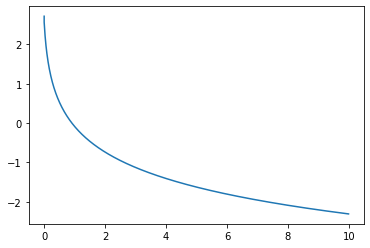

In [122]:
#Test ordre 1 : on résout x_point = x
def h(T, x):
    return -np.exp(x)

tracer_eul(h, np.exp(1), 0.01)
subdiv = np.arange(0, 1000 * 0.01, 0.01)
#plt.plot(subdiv, np.exp(subdiv))
#A commenter

En orange a été tracée la courbe exacte de la solution de l'équation différentielle 
$\dot x = x$ , entre 0 et 10.
En bleu, il s'agit de notre solution approchée par Euler explicite avec un pas de temps de 0.01 sur le même intervalle \[0, 10\[ . Illustrons alors la convergence pour cet exemple d'Euler explicite. Pour la consistance, celle-ci correspond intuitivement au fait que la solution approchée pour un dt petit est très proche de la solution exacte. C'est ici le cas. 
Pour ce qui est de la stabilité, on va créer une fonction perturb qui sort le max des écarts pour une perturbation donnée et indépendante du numéro de l'itérationet une fonction donnée. Ainsi, on pourra tracer perturb($\delta$), et voir si on peut majorer cette fonction par une fonction linéaire en $\delta$. 

In [123]:
def perturb(f, x0, delta, dt, n = 1000):
    fperturb = lambda t, x : f(t, x) + delta/dt # on créé la fonction f perturbée 
    y = solve_euler_explicit(f, x0, dt)[1]
    yperturb = solve_euler_explicit(fperturb, x0, dt)[1]
    if type(x0) == np.ndarray :
        y = [y[i][0] for i in range(len(y))]
        yperturb = [yperturb[i][0] for i in range(len(yperturb))]
 
    diff = []
    for k,l in zip(y, yperturb):
        diff.append(k-l)
    return np.max([np.linalg.norm(x) for x in diff])


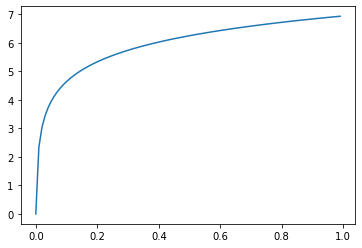

In [124]:
liste_deltas = np.arange(0, 1, 0.01)
plt.plot(liste_deltas, [perturb(h, 1, liste_deltas[i], 0.01)for i in range(len(liste_deltas))])

ttt


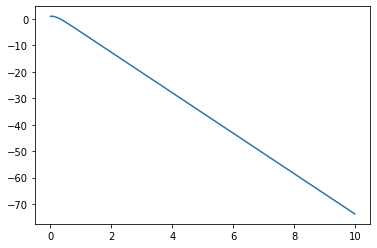

In [113]:
#Test ordte 2 : on résout x_point_point = -W*x

W=10

def g(T, x):
    return np.array([x[1],  - W * np.exp(x[0])])

tracer_eul(g, np.array([1.0, 1.0]), 0.01, 1000)


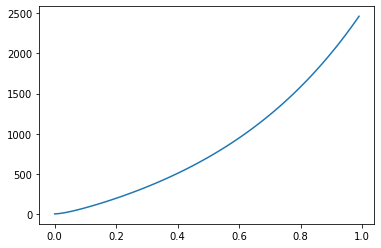

In [125]:
liste_deltas = [np.array([x, 0]) for x in np.arange(0, 1, 0.01)]
plt.plot([x[0] for x in liste_deltas], [perturb(g, np.array([0, 1]), liste_deltas[i], 0.01)for i in range(len(liste_deltas))])

In [20]:
np.array([0, 1]) + np.array([0, 1])
np.linalg.norm(-2)

2.0